In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# 시스템에 따라 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우의 기본 한글 폰트
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'  # 리눅스, Colab 등

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [82]:
df = pd.read_csv('data/call119_train.csv', encoding = 'cp949', index_col = 0)
df_cat = pd.read_csv('data/cat119_train.csv', encoding = 'cp949', index_col = 0)

In [84]:
df.head()

,call119_train.tm,call119_train.address_city,call119_train.address_gu,call119_train.sub_address,call119_train.stn,call119_train.ta_max,call119_train.ta_min,call119_train.ta_max_min,call119_train.hm_min,call119_train.hm_max,call119_train.ws_max,call119_train.ws_ins_max,call119_train.rn_day,call119_train.call_count
1,20200501,부산광역시,강서구,대저2동,904,23.7,16.6,7.1,63.2,90.3,5.8,10.6,0.0,1
2,20200501,부산광역시,강서구,천성동,921,24.3,15.4,8.9,64.2,96.4,4.8,8.6,0.0,1
3,20200501,부산광역시,금정구,금사동,940,25.6,17.2,8.4,46.6,76.4,4.8,8.3,0.0,1
4,20200501,부산광역시,금정구,금성동,941,25.3,17.1,8.2,-99.0,-99.0,7.1,9.7,0.0,1
5,20200501,부산광역시,금정구,남산동,939,26.5,16.7,9.8,-99.0,-99.0,5.7,8.1,0.0,3


In [86]:
df_cat.head()

,cat119_train.tm,cat119_train.address_city,cat119_train.address_gu,cat119_train.sub_address,cat119_train.cat,cat119_train.sub_cat,cat119_train.stn,cat119_train.call_count
1,20200501,부산광역시,강서구,대저2동,구급,교통사고,904,1
2,20200501,부산광역시,강서구,천성동,구조,교통사고,921,1
3,20200501,부산광역시,금정구,금사동,구급,부상,940,1
4,20200501,부산광역시,금정구,금성동,기타,업무운행,941,1
5,20200501,부산광역시,금정구,남산동,구급,부상,939,1


In [88]:
df.info() #결측값은 없음

<class 'pandas.core.frame.DataFrame'>
Index: 42924 entries, 1 to 42924
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   call119_train.tm            42924 non-null  int64  
 1   call119_train.address_city  42924 non-null  object 
 2   call119_train.address_gu    42924 non-null  object 
 3   call119_train.sub_address   42924 non-null  object 
 4   call119_train.stn           42924 non-null  int64  
 5   call119_train.ta_max        42924 non-null  float64
 6   call119_train.ta_min        42924 non-null  float64
 7   call119_train.ta_max_min    42924 non-null  float64
 8   call119_train.hm_min        42924 non-null  float64
 9   call119_train.hm_max        42924 non-null  float64
 10  call119_train.ws_max        42924 non-null  float64
 11  call119_train.ws_ins_max    42924 non-null  float64
 12  call119_train.rn_day        42924 non-null  float64
 13  call119_train.call_count    42924 no

In [90]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61771 entries, 1 to 61771
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   cat119_train.tm            61771 non-null  int64 
 1   cat119_train.address_city  61771 non-null  object
 2   cat119_train.address_gu    61771 non-null  object
 3   cat119_train.sub_address   61771 non-null  object
 4   cat119_train.cat           61771 non-null  object
 5   cat119_train.sub_cat       61771 non-null  object
 6   cat119_train.stn           61771 non-null  int64 
 7   cat119_train.call_count    61771 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 4.2+ MB


In [92]:
from datetime import datetime

In [94]:
# 날짜 형식으로 변경
df['call119_train.tm'] = pd.to_datetime(df['call119_train.tm'].astype(str), format='%Y%m%d')
df_cat['cat119_train.tm'] = pd.to_datetime(df_cat['cat119_train.tm'].astype(str), format='%Y%m%d')

In [96]:
# 년, 월, 일 추출
df['year'] = df['call119_train.tm'].dt.year
df['month'] = df['call119_train.tm'].dt.month
df['day'] = df['call119_train.tm'].dt.day

df_cat['year'] = df_cat['cat119_train.tm'].dt.year
df_cat['month'] = df_cat['cat119_train.tm'].dt.month
df_cat['day'] = df_cat['cat119_train.tm'].dt.day

In [98]:
df['year'].value_counts()

year
2021    11433
2022    10840
2023    10552
2020    10099
Name: count, dtype: int64

In [100]:
df_cat['year'].value_counts()

year
2021    17454
2022    15557
2023    14711
2020    14049
Name: count, dtype: int64

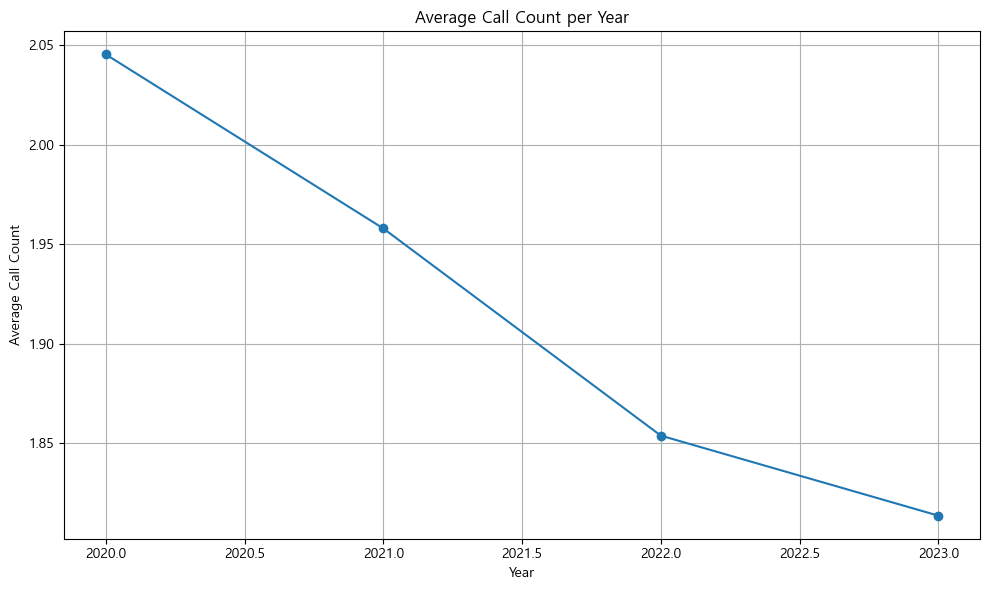

In [102]:
# 연도별  call_count 평균
yearly_avg = df.groupby('year')['call119_train.call_count'].mean()

# 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o')
plt.title('Average Call Count per Year')
plt.xlabel('Year')
plt.ylabel('Average Call Count')
plt.grid(True)
plt.tight_layout()
plt.show()

- 2020년에 신고 건수가 많음
- 코로나 19, 일반 병원 응급실이 폐쇄되는 사례...

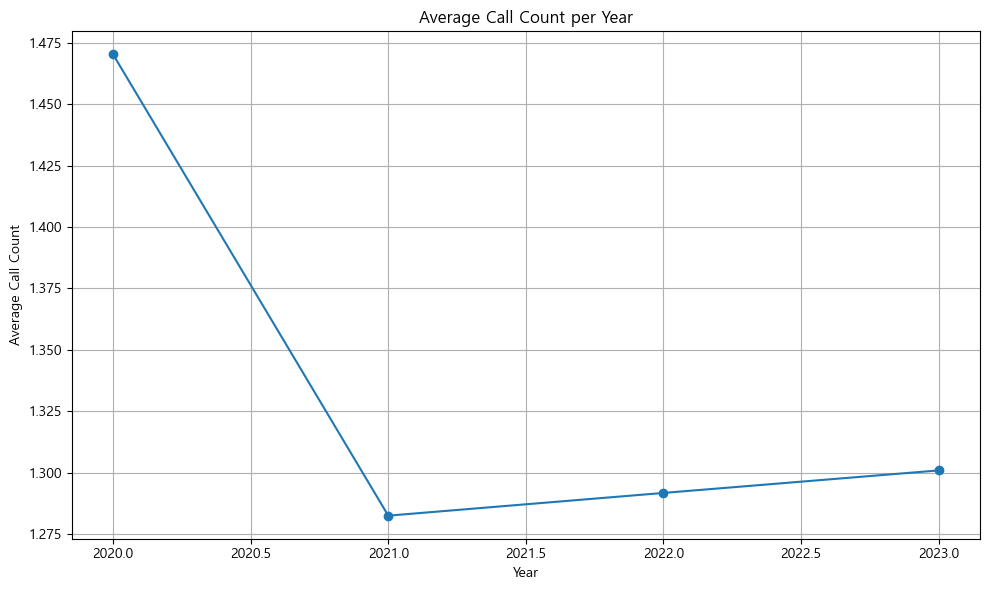

In [105]:
# 연도별  call_count 평균
yearly_avg = df_cat.groupby('year')['cat119_train.call_count'].mean()

# 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o')
plt.title('Average Call Count per Year')
plt.xlabel('Year')
plt.ylabel('Average Call Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [106]:
df_cat[df_cat['year'] == 2020]['cat119_train.cat'].value_counts()

cat119_train.cat
구급    9655
구조    2384
기타    1989
화재      21
Name: count, dtype: int64

In [109]:
df_cat[df_cat['year'] == 2020]['cat119_train.sub_cat'].value_counts()

cat119_train.sub_cat
부상           5453
교통사고         4621
업무운행         1317
자연재해         1046
구급기타          496
상황출동          481
수난사고          222
산악사고          200
대민지원           85
지원출동(풍수해)      39
산불             21
지원출동(기타)       19
예방경계           17
지원출동(급수)       16
지원출동(재해)        4
기타              4
지원출동(전기)        4
산사태             2
구급예약            1
지원출동(환경)        1
Name: count, dtype: int64

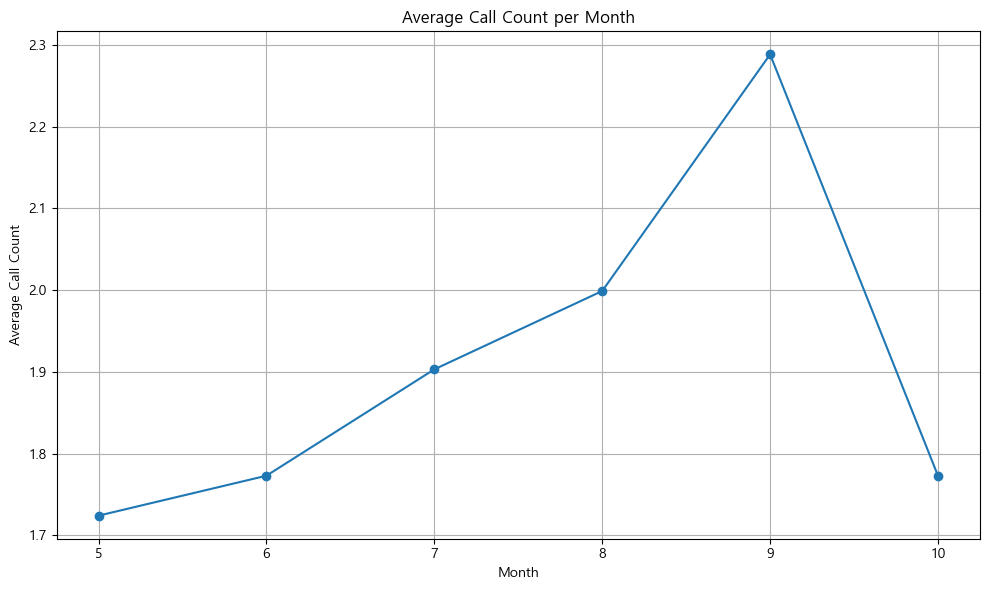

In [111]:
# 월별  call_count 평균
monthly_avg = df.groupby('month')['call119_train.call_count'].mean()

# 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.title('Average Call Count per Month')
plt.xlabel('Month')
plt.ylabel('Average Call Count')
plt.grid(True)
plt.tight_layout()
plt.show()

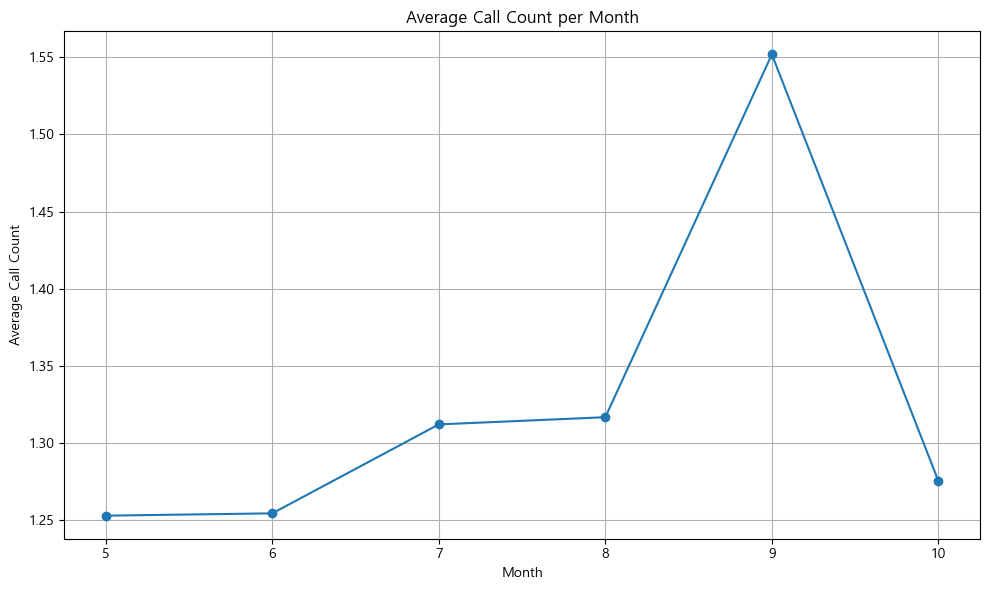

In [112]:
# 월별  call_count 평균
monthly_avg = df_cat.groupby('month')['cat119_train.call_count'].mean()

# 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.title('Average Call Count per Month')
plt.xlabel('Month')
plt.ylabel('Average Call Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [115]:
df_cat[df_cat['month'] == 9]['cat119_train.cat'].value_counts()

cat119_train.cat
구급    7467
구조    1800
기타    1698
화재      10
Name: count, dtype: int64

In [117]:
df_cat[df_cat['month'] == 9]['cat119_train.sub_cat'].value_counts()

cat119_train.sub_cat
부상            4054
교통사고          2949
업무운행          1349
구급기타          1033
자연재해           873
상황출동           216
수난사고           191
산악사고           164
지원출동(풍수해)       56
대민지원            34
지원출동(기타)        13
지원출동(재해)        11
산불              10
지원출동(급수)         9
예방경계             3
지원출동(전기)         2
지원출동(환경)         2
지원출동(가옥정리)       2
구급예약             2
기타               1
항공구조(항공사고)       1
Name: count, dtype: int64

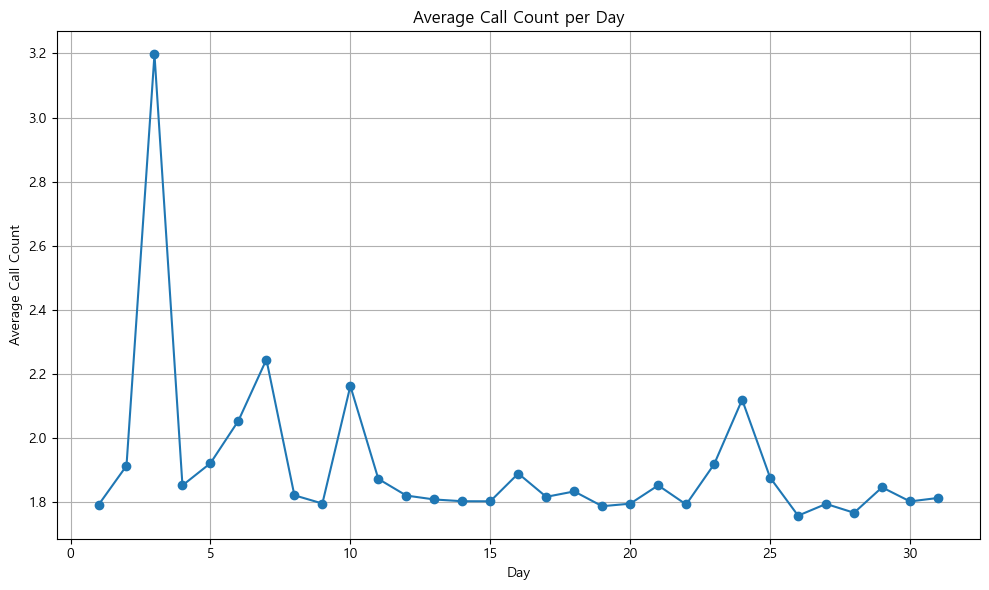

In [119]:
# 일별  call_count 평균
daily_avg = df.groupby('day')['call119_train.call_count'].mean()

# 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(daily_avg.index, daily_avg.values, marker='o')
plt.title('Average Call Count per Day')
plt.xlabel('Day')
plt.ylabel('Average Call Count')
plt.grid(True)
plt.tight_layout()
plt.show()

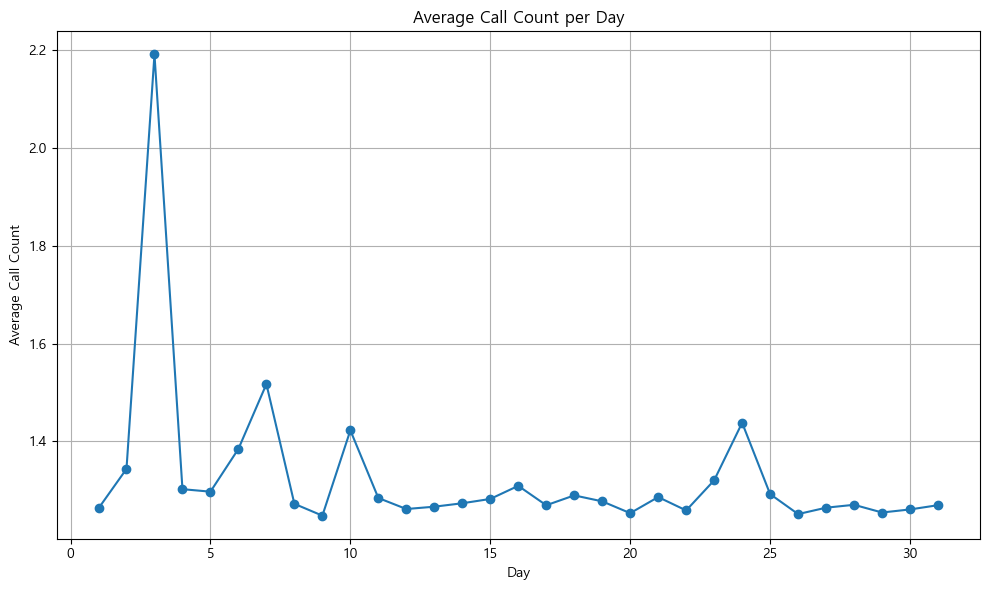

In [121]:
# 일별  call_count 평균
daily_avg = df_cat.groupby('day')['cat119_train.call_count'].mean()

# 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(daily_avg.index, daily_avg.values, marker='o')
plt.title('Average Call Count per Day')
plt.xlabel('Day')
plt.ylabel('Average Call Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [123]:
df_cat[df_cat['day'] == 3]['cat119_train.cat'].value_counts()

cat119_train.cat
구급    1459
구조     328
기타     327
화재       3
Name: count, dtype: int64

In [125]:
df_cat[df_cat['day'] == 3]['cat119_train.sub_cat'].value_counts()

cat119_train.sub_cat
부상           774
교통사고         628
업무운행         237
구급기타         192
자연재해         127
상황출동          51
산악사고          39
수난사고          27
지원출동(풍수해)     22
대민지원           7
지원출동(급수)       4
산불             3
지원출동(재해)       3
지원출동(전기)       2
예방경계           1
Name: count, dtype: int64

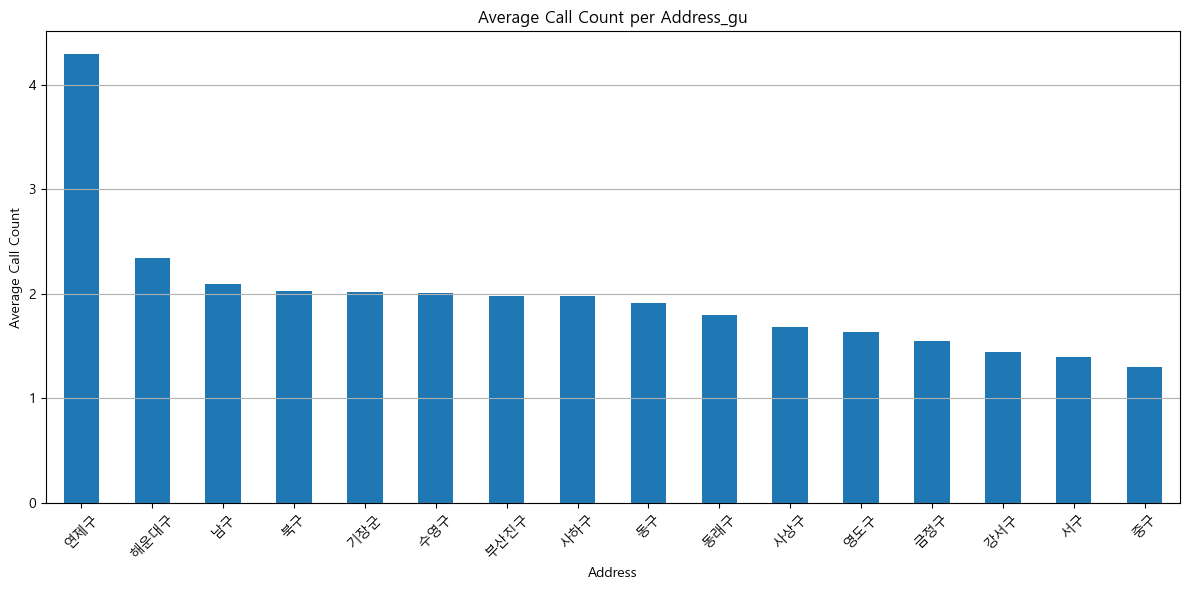

In [127]:
# 구별 call_count 평균 계산
district_avg = df.groupby('call119_train.address_gu')['call119_train.call_count'].mean()

# 그ㅐ프 출력
plt.figure(figsize=(12, 6))
district_avg.sort_values(ascending=False).plot(kind='bar')
plt.title('Average Call Count per Address_gu')
plt.xlabel('Address')
plt.ylabel('Average Call Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

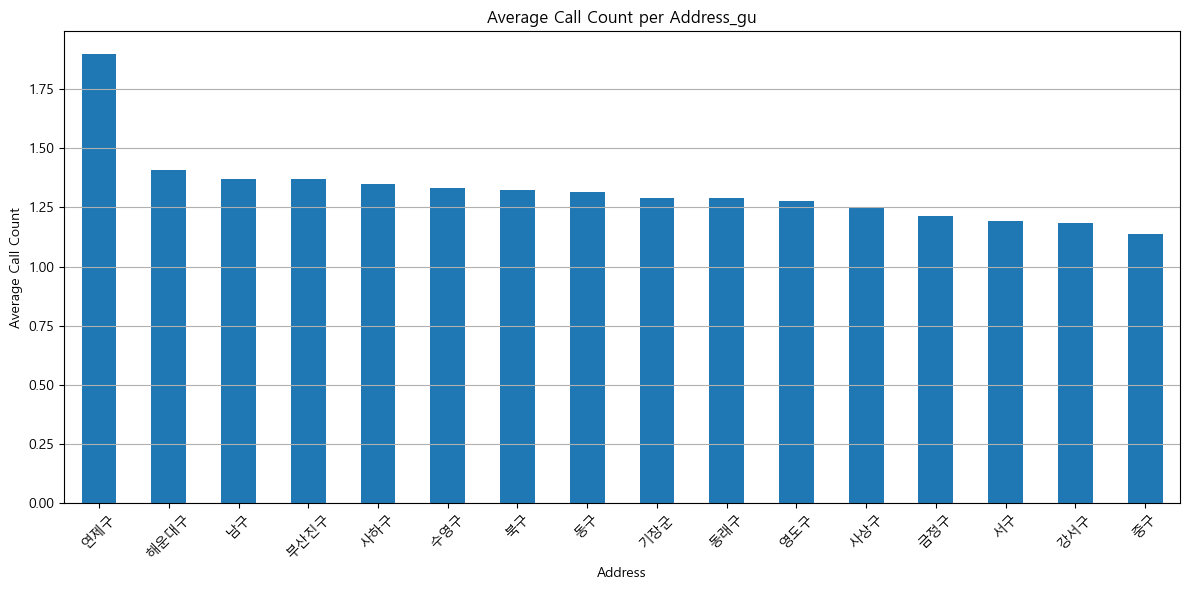

In [129]:
# 구별 call_count 평균 계산
district_avg = df_cat.groupby('cat119_train.address_gu')['cat119_train.call_count'].mean()

# 그ㅐ프 출력
plt.figure(figsize=(12, 6))
district_avg.sort_values(ascending=False).plot(kind='bar')
plt.title('Average Call Count per Address_gu')
plt.xlabel('Address')
plt.ylabel('Average Call Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

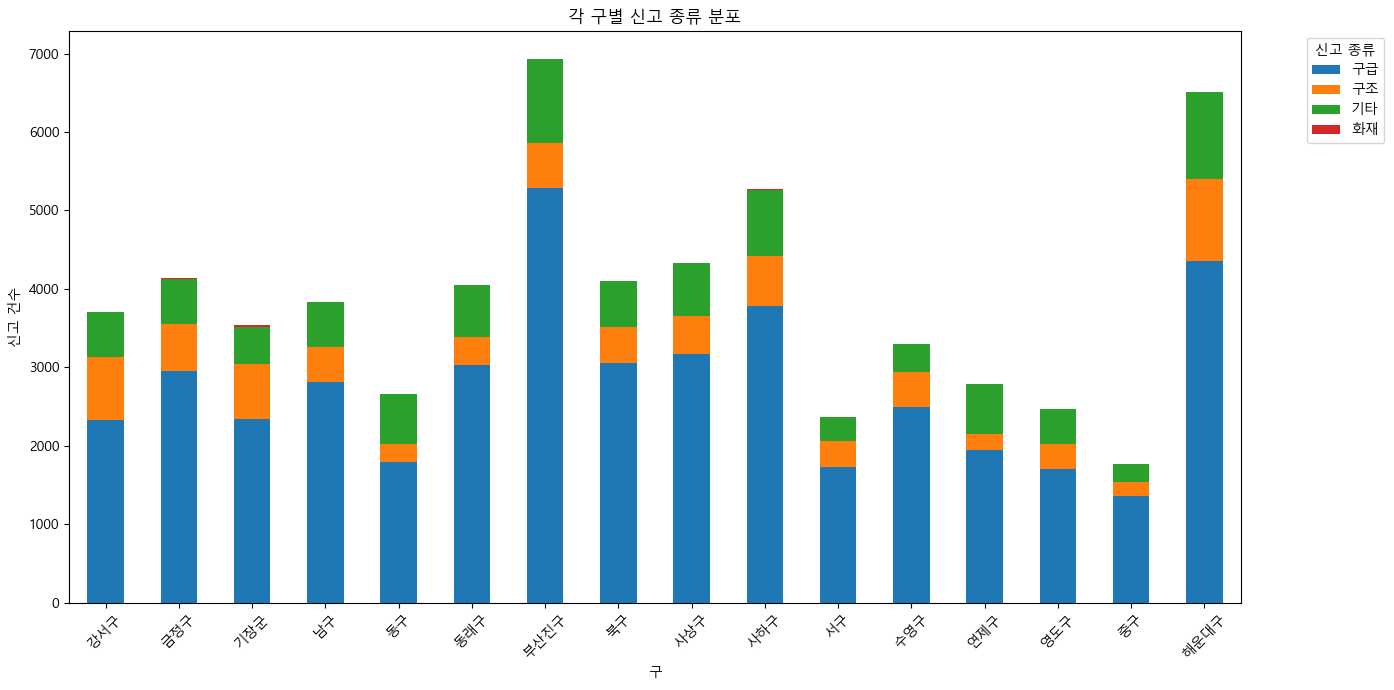

In [130]:
# 구별(cat119_train.address_gu) x 신고종류(cat119_train.cat) 교차표 생성
cross_tab = pd.crosstab(df_cat['cat119_train.address_gu'], df_cat['cat119_train.cat'])

# 그래프 크기 설정
plt.figure(figsize=(14, 7))

# 누적 막대그래프
cross_tab.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.title('각 구별 신고 종류 분포')
plt.xlabel('구')
plt.ylabel('신고 건수')
plt.xticks(rotation=45)
plt.legend(title='신고 종류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

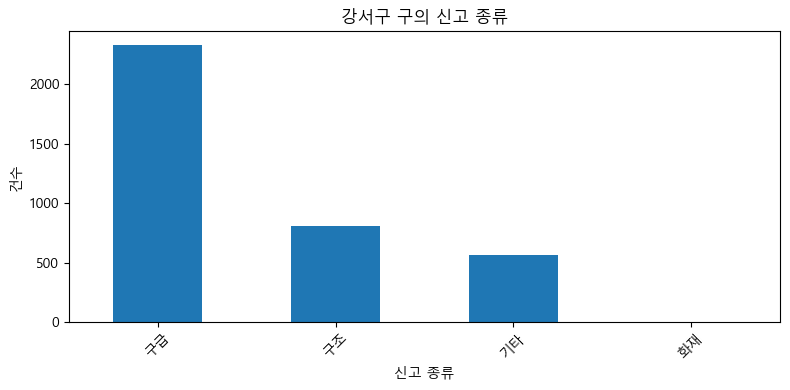

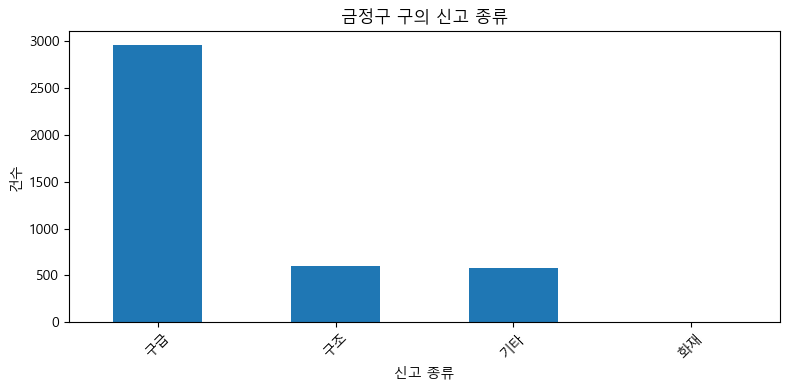

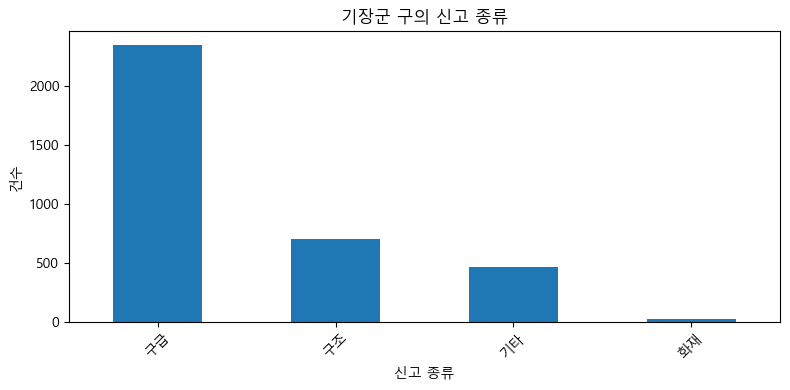

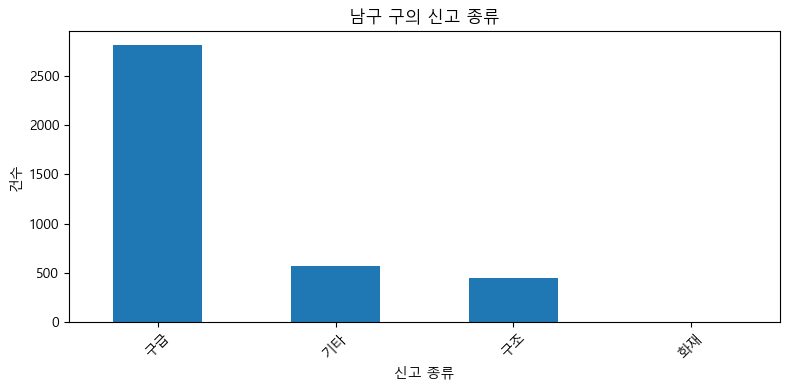

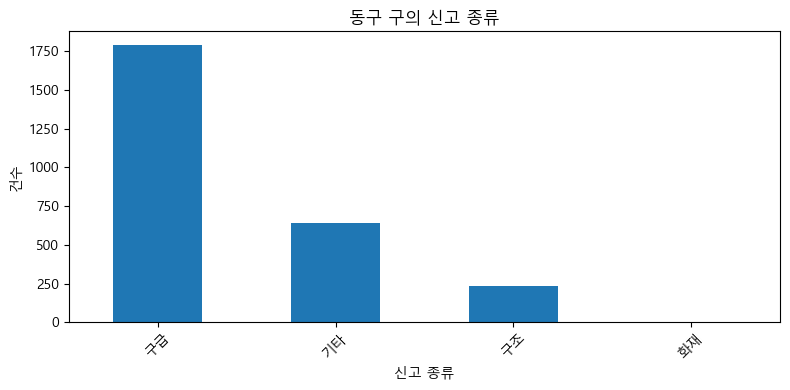

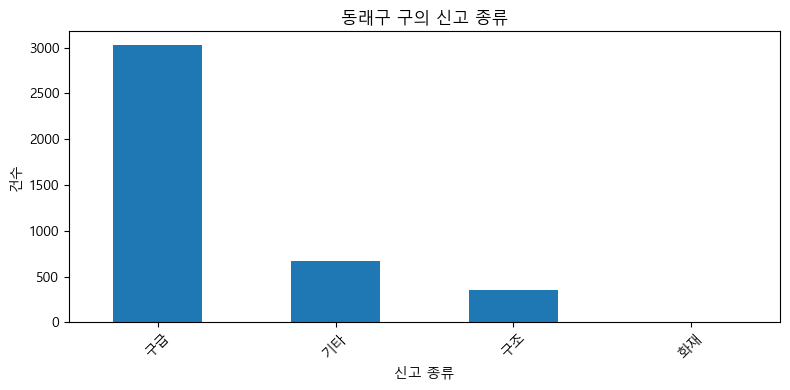

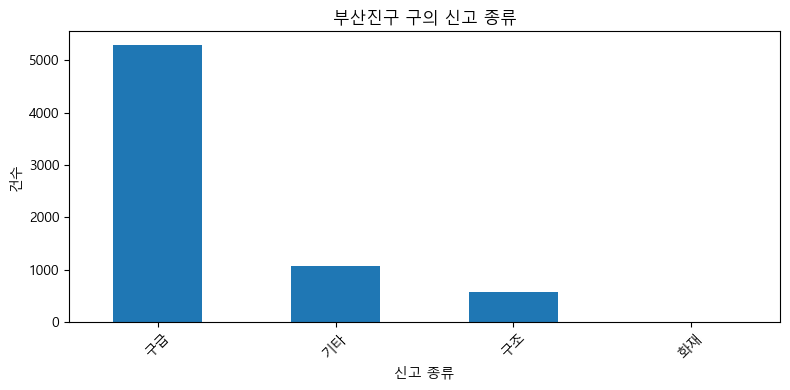

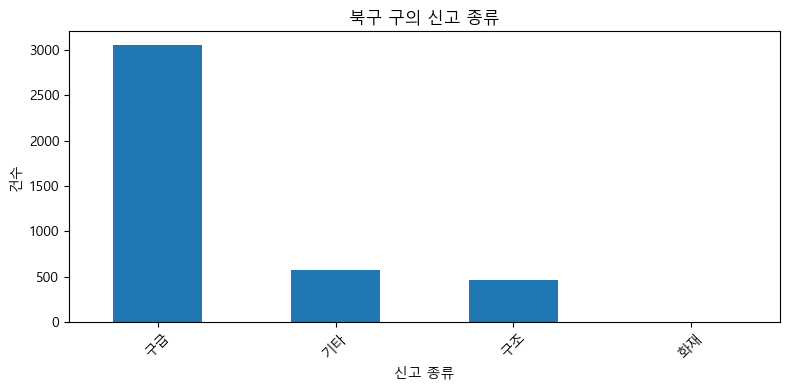

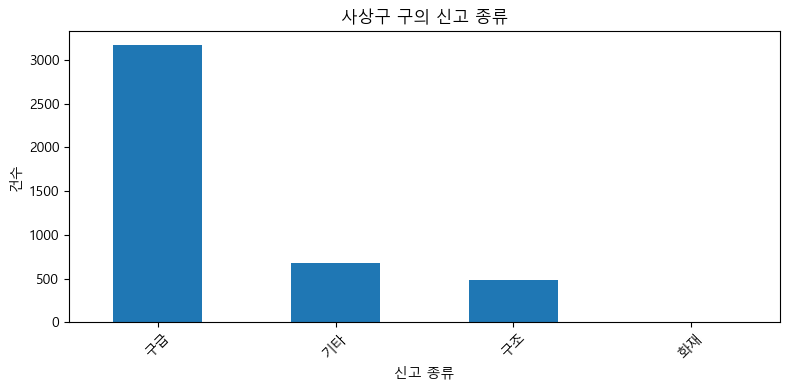

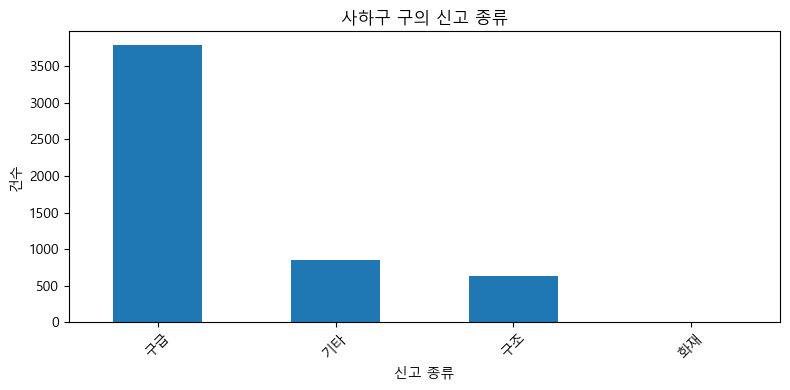

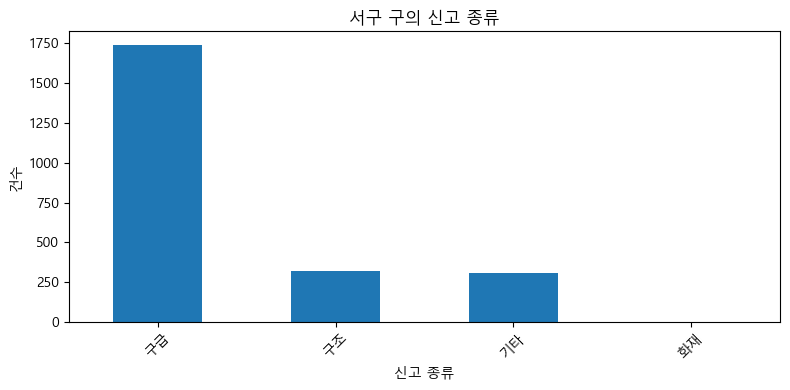

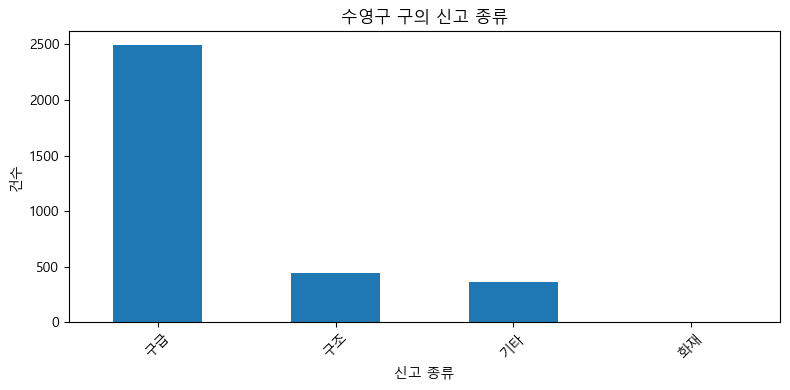

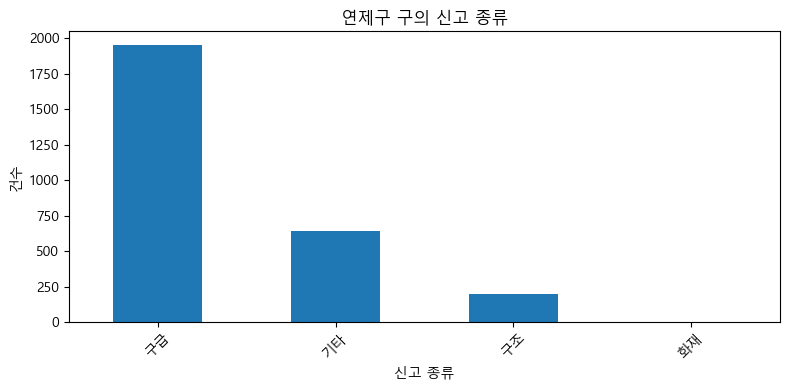

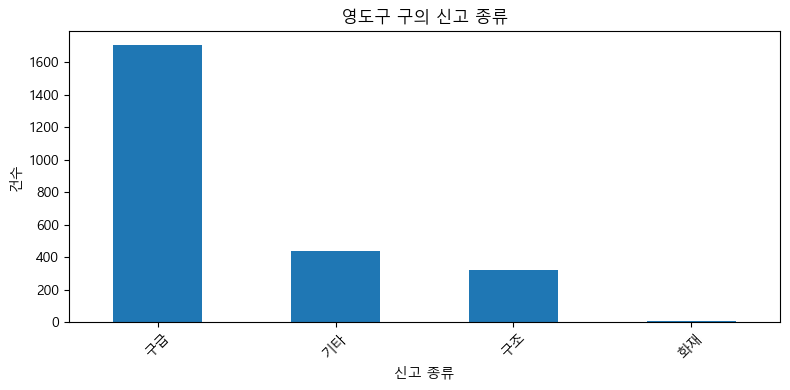

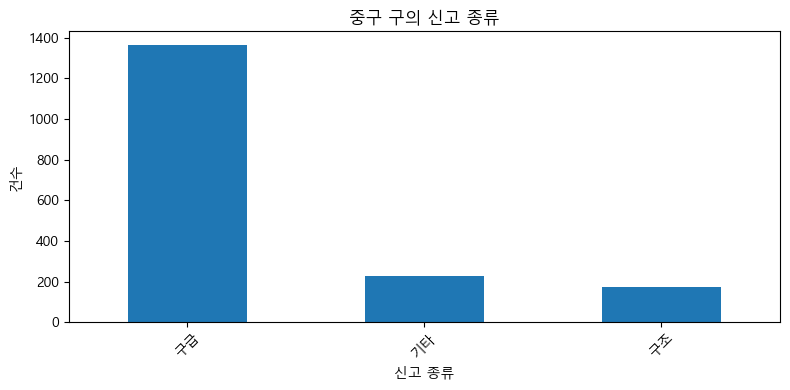

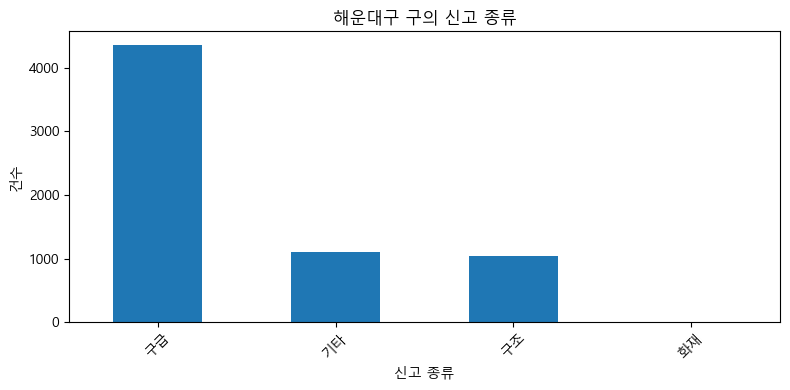

In [132]:
unique_districts = df_cat['cat119_train.address_gu'].unique()

for district in unique_districts:
    subset = df_cat[df_cat['cat119_train.address_gu'] == district]
    cat_counts = subset['cat119_train.cat'].value_counts()

    plt.figure(figsize=(8, 4))
    cat_counts.plot(kind='bar')
    plt.title(f'{district} 구의 신고 종류')
    plt.xlabel('신고 종류')
    plt.ylabel('건수')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Figure size 1400x700 with 0 Axes>

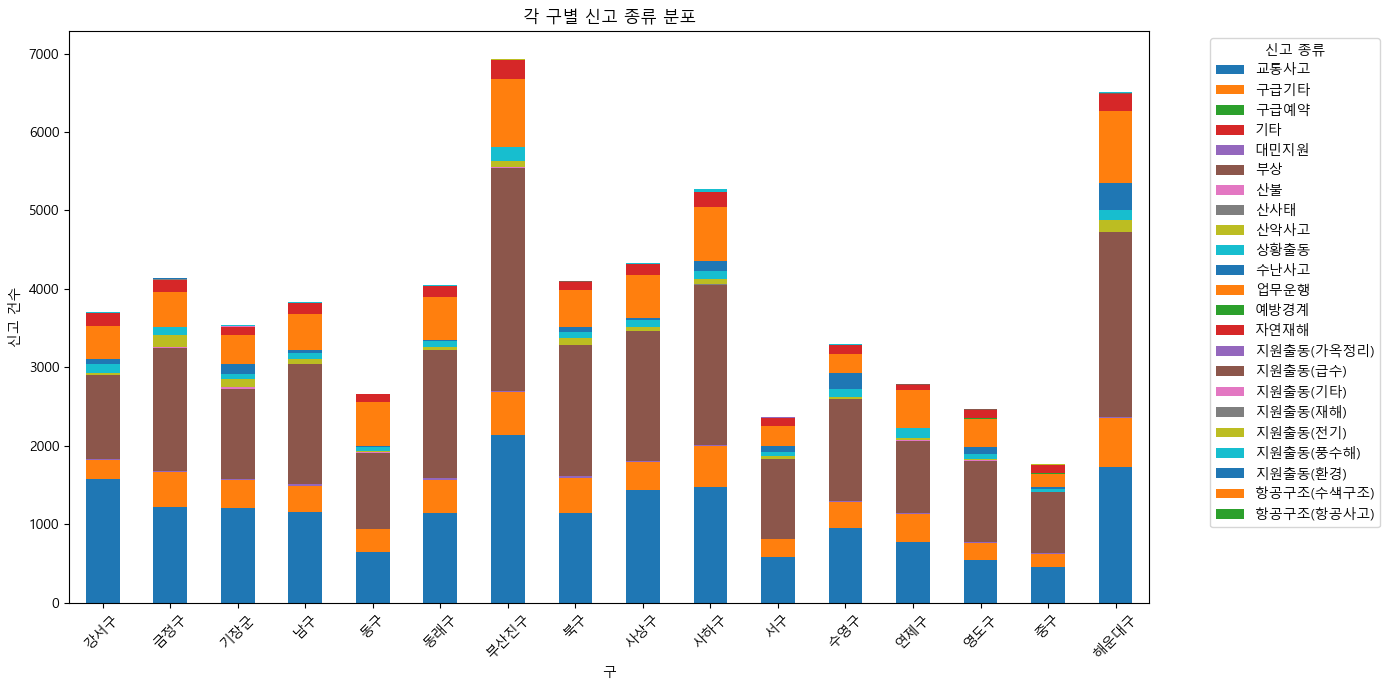

In [134]:
# 구별(cat119_train.address_gu) x 신고종류(cat119_train.cat) 교차표 생성
cross_tab = pd.crosstab(df_cat['cat119_train.address_gu'], df_cat['cat119_train.sub_cat'])

# 그래프 크기 설정
plt.figure(figsize=(14, 7))

# 누적 막대그래프
cross_tab.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.title('각 구별 신고 종류 분포')
plt.xlabel('구')
plt.ylabel('신고 건수')
plt.xticks(rotation=45)
plt.legend(title='신고 종류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

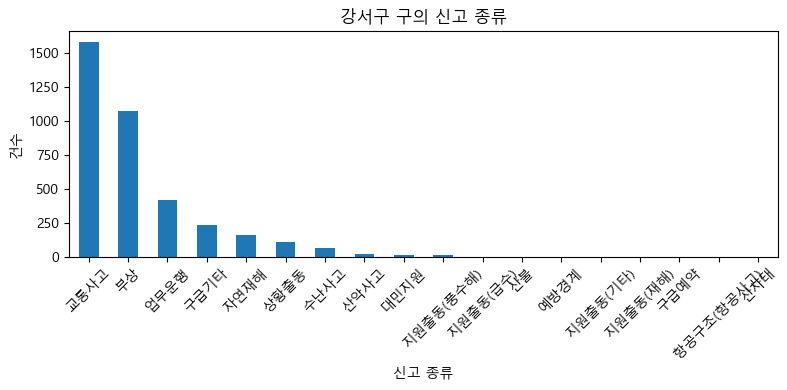

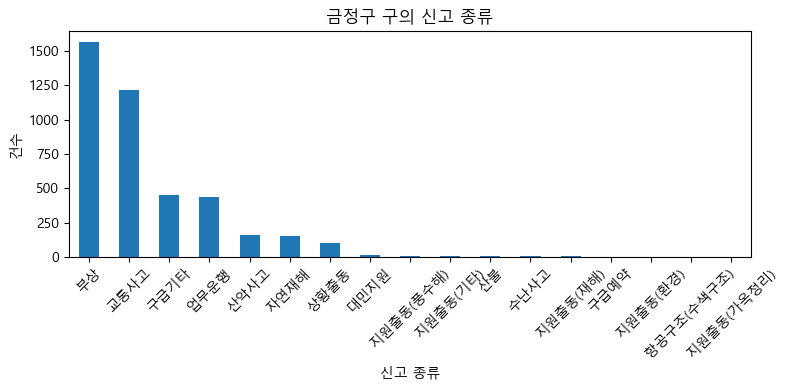

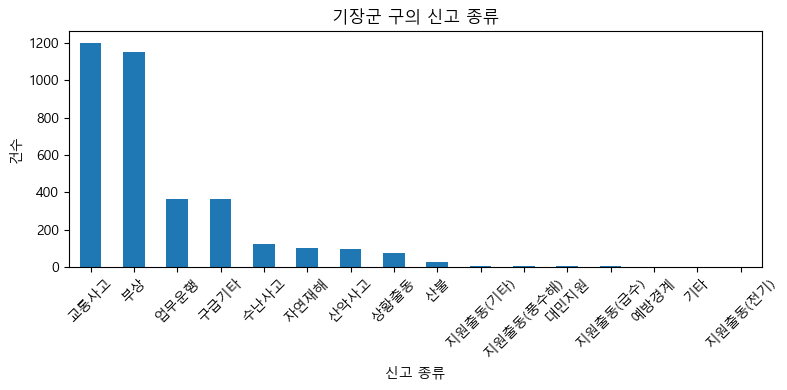

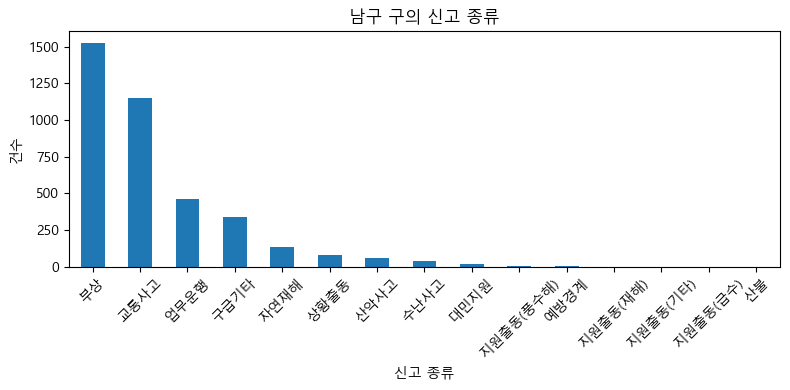

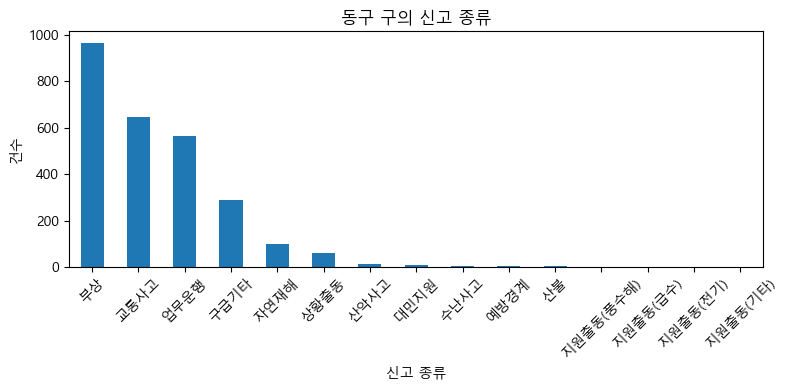

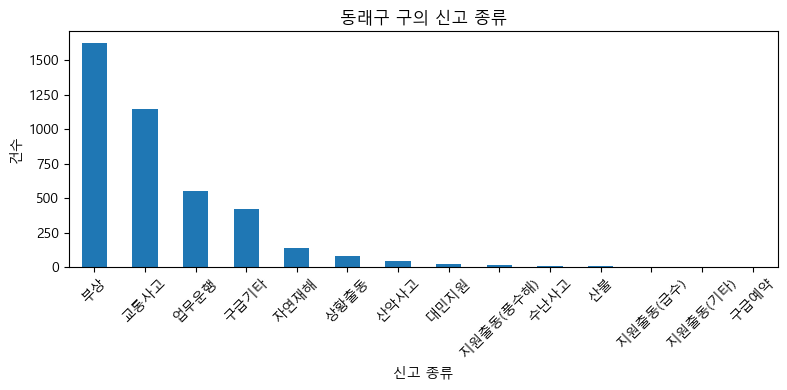

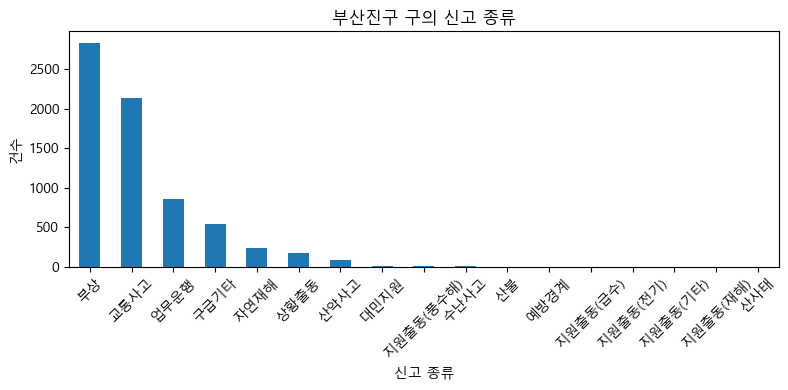

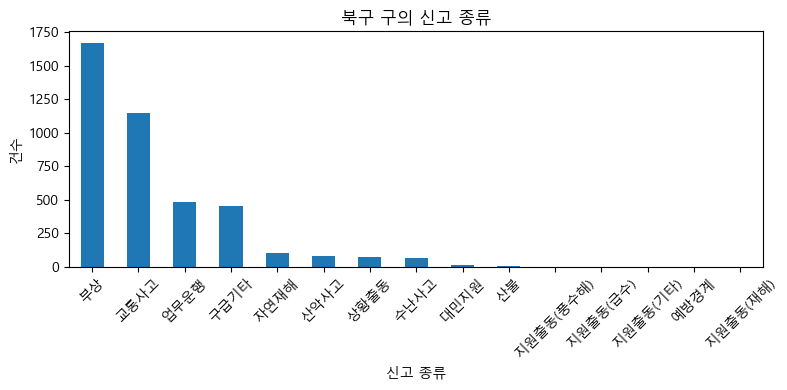

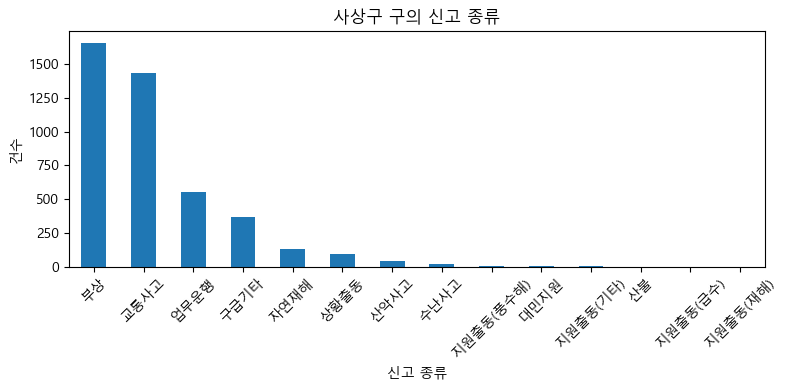

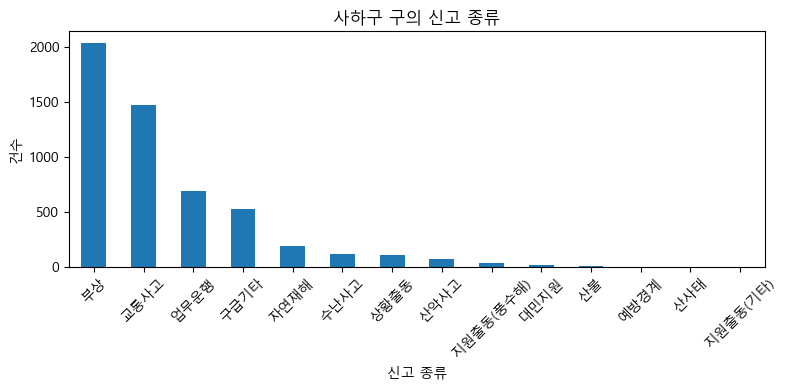

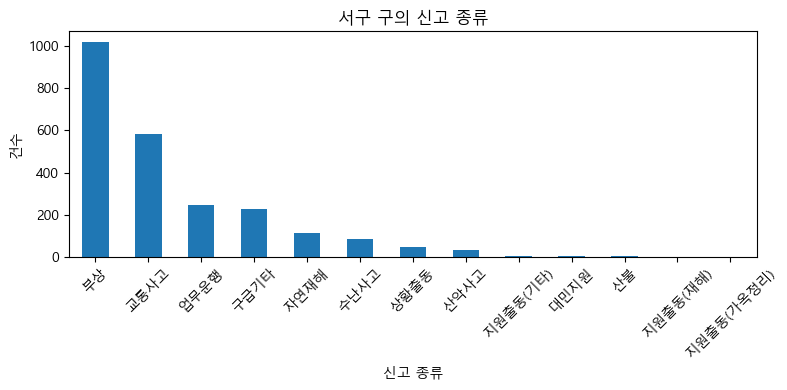

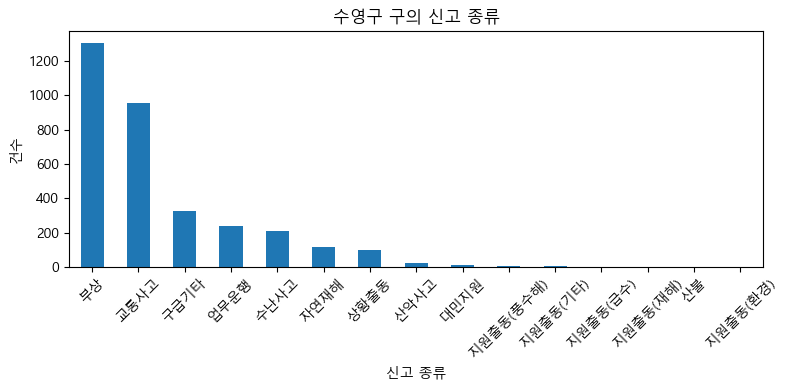

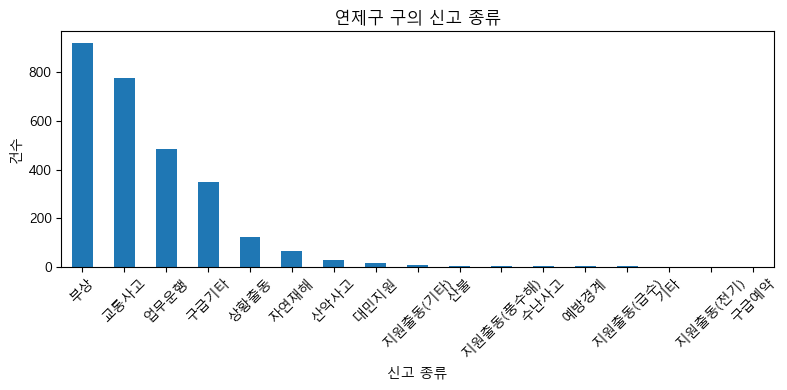

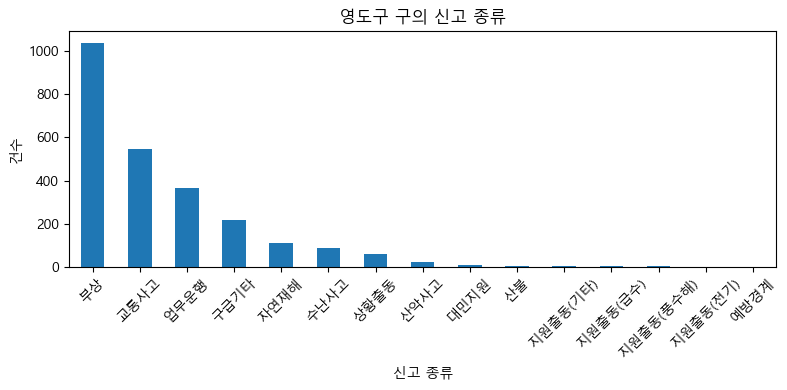

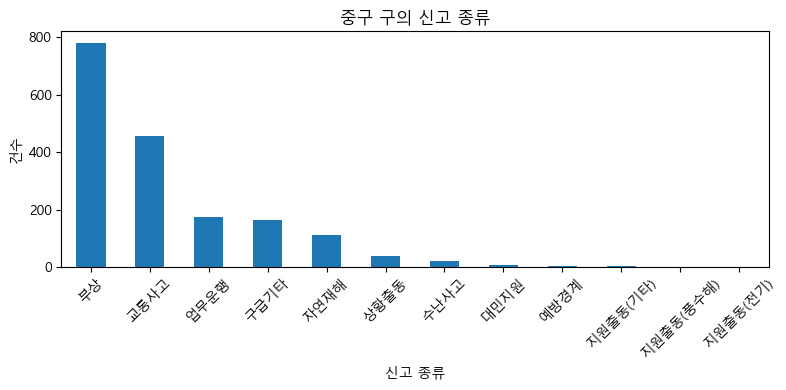

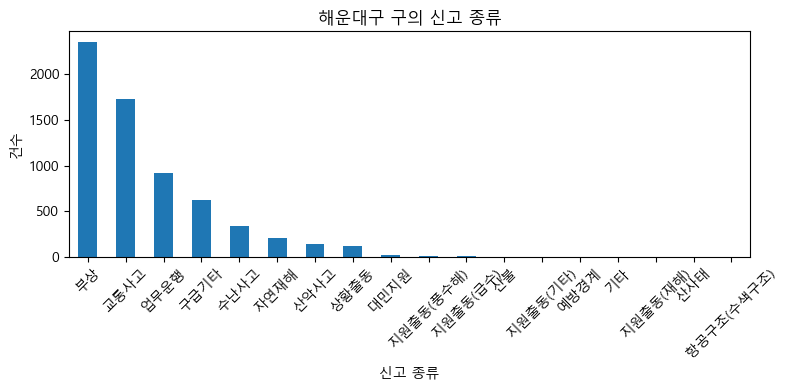

In [135]:
unique_districts = df_cat['cat119_train.address_gu'].unique()

for district in unique_districts:
    subset = df_cat[df_cat['cat119_train.address_gu'] == district]
    cat_counts = subset['cat119_train.sub_cat'].value_counts()

    plt.figure(figsize=(8, 4))
    cat_counts.plot(kind='bar')
    plt.title(f'{district} 구의 신고 종류')
    plt.xlabel('신고 종류')
    plt.ylabel('건수')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Figure size 1400x700 with 0 Axes>

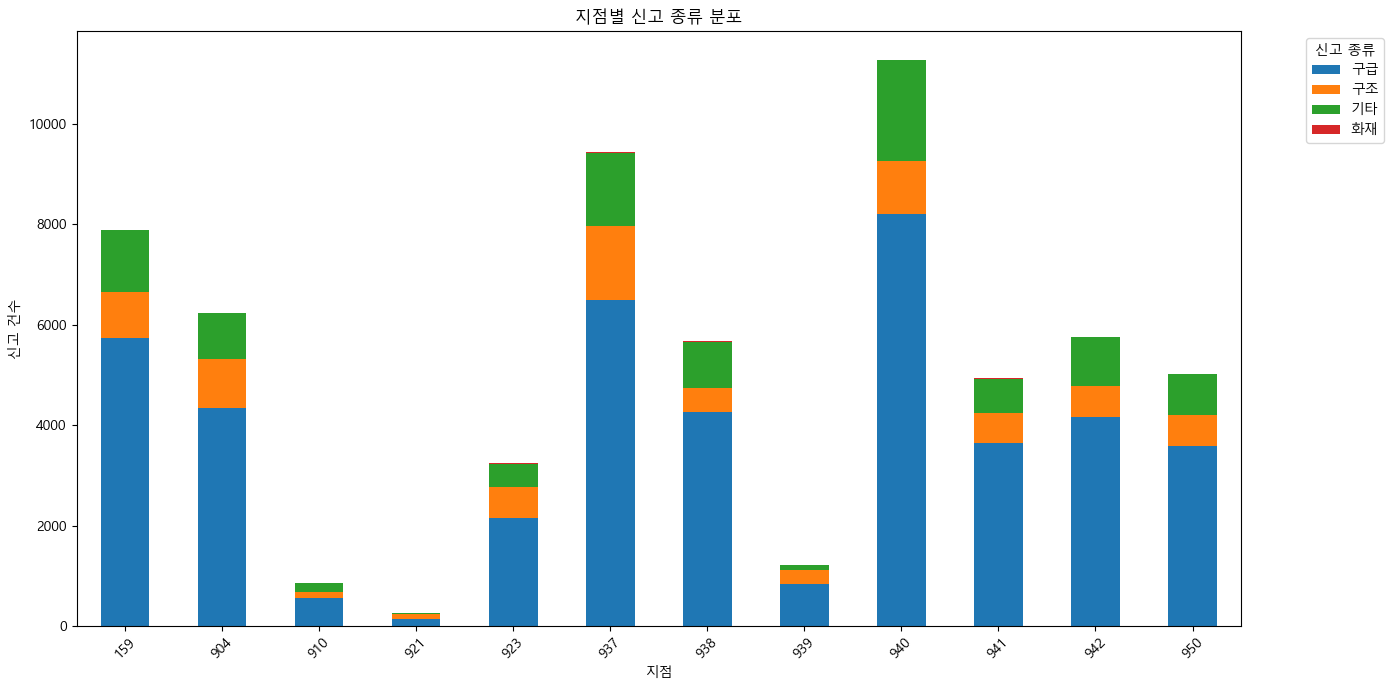

In [138]:
# 지점(cat119_train.STN) x 신고종류(cat119_train.cat) 교차표 생성
cross_tab = pd.crosstab(df_cat['cat119_train.stn'], df_cat['cat119_train.cat'])

# 그래프 크기 설정
plt.figure(figsize=(14, 7))

# 누적 막대그래프
cross_tab.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.title('지점별 신고 종류 분포')
plt.xlabel('지점')
plt.ylabel('신고 건수')
plt.xticks(rotation=45)
plt.legend(title='신고 종류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

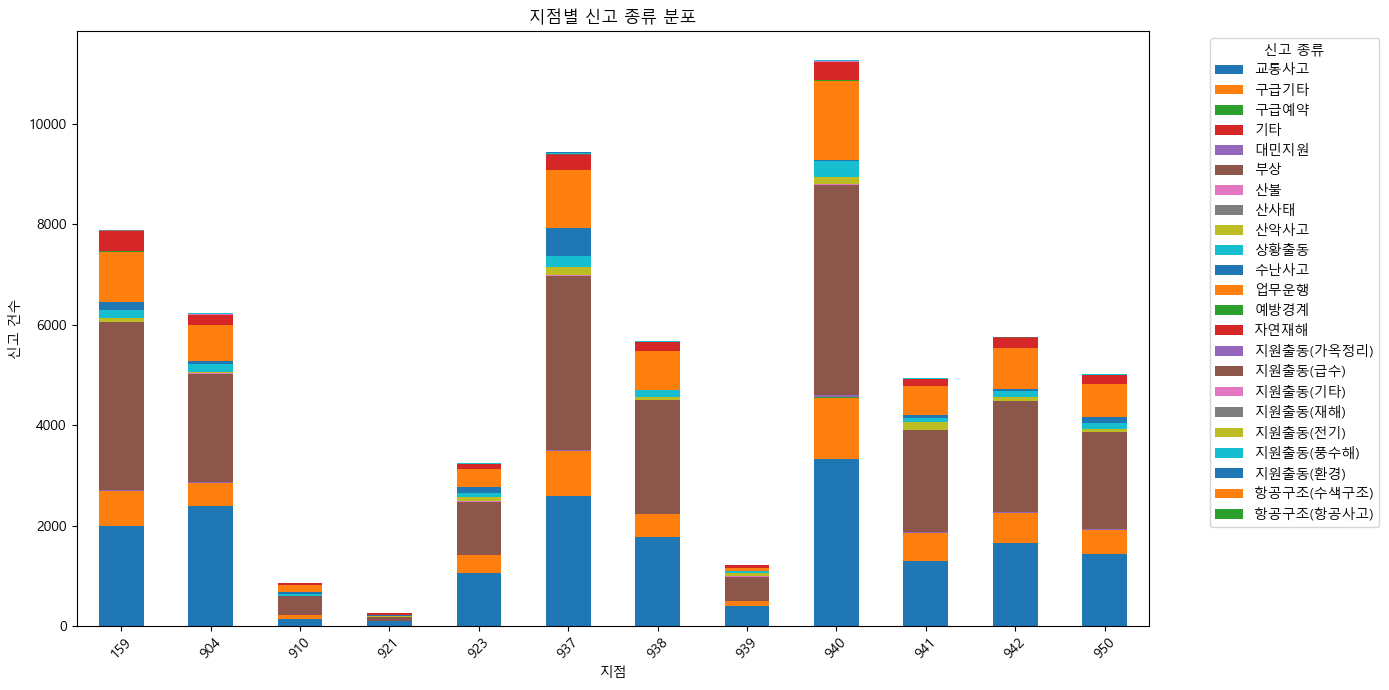

In [140]:
# 지점별(cat119_train.stn) x 신고종류(cat119_train.cat) 교차표 생성
cross_tab = pd.crosstab(df_cat['cat119_train.stn'], df_cat['cat119_train.sub_cat'])

# 그래프 크기 설정
plt.figure(figsize=(14, 7))

# 누적 막대그래프
cross_tab.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.title('지점별 신고 종류 분포')
plt.xlabel('지점')
plt.ylabel('신고 건수')
plt.xticks(rotation=45)
plt.legend(title='신고 종류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

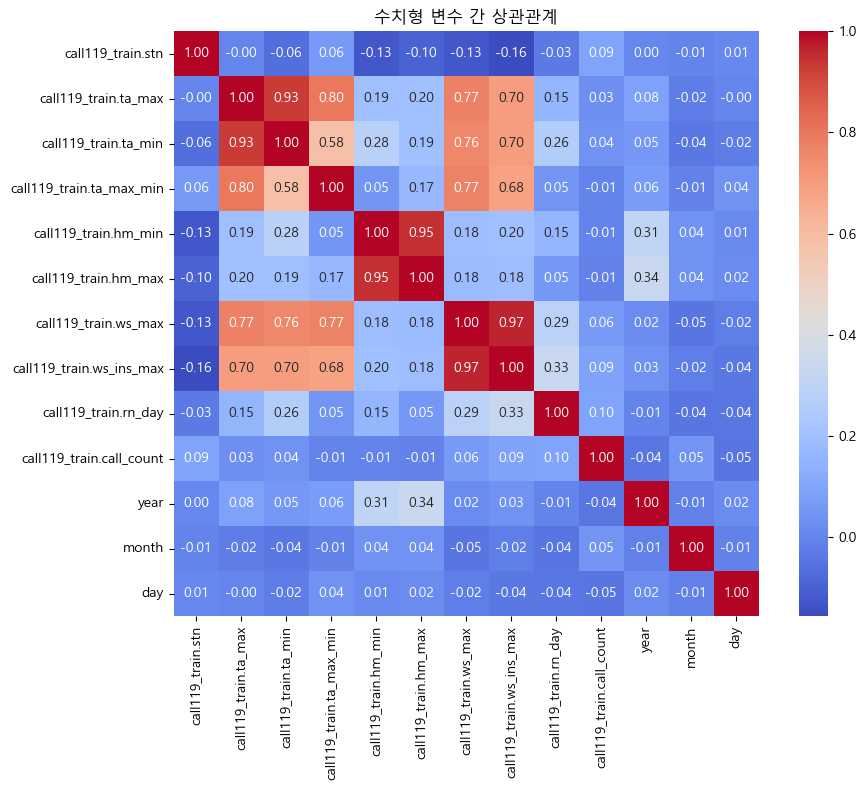

In [60]:
# 수치형 상관계수
num_df = df.select_dtypes(include='number')

corr_matrix = num_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('수치형 변수 간 상관관계')
plt.tight_layout()
plt.show()

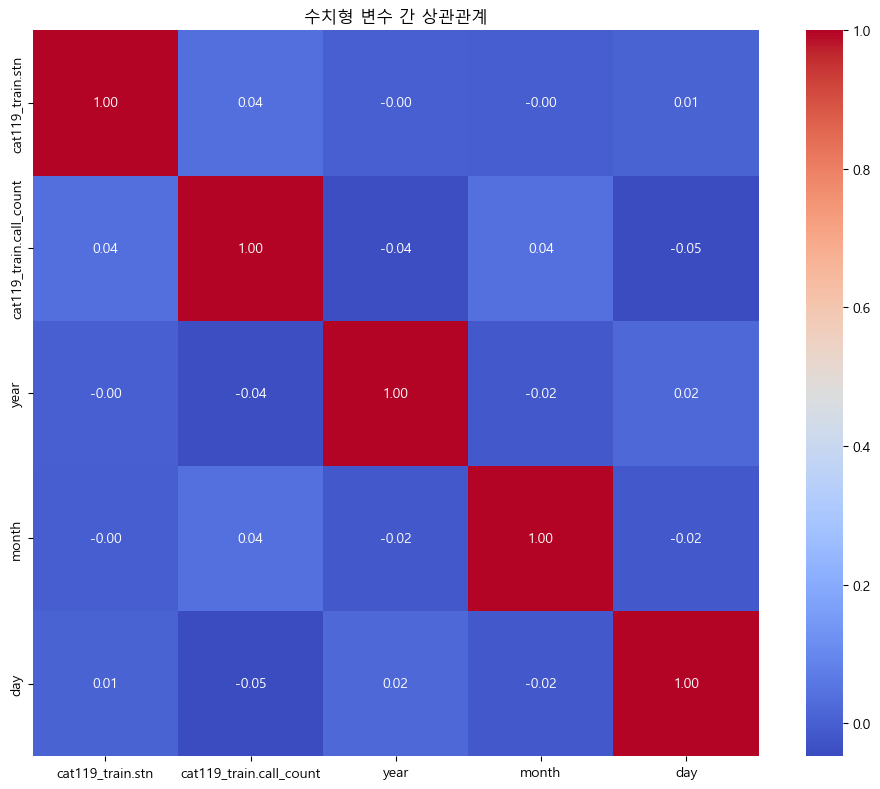

In [61]:
# 수치형 상관계수
num_df = df_cat.select_dtypes(include='number')

corr_matrix = num_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('수치형 변수 간 상관관계')
plt.tight_layout()
plt.show()

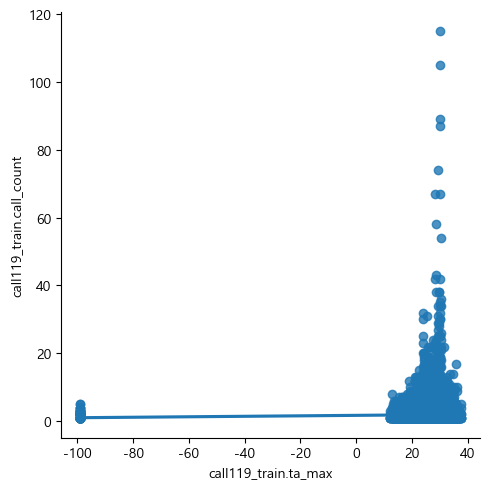

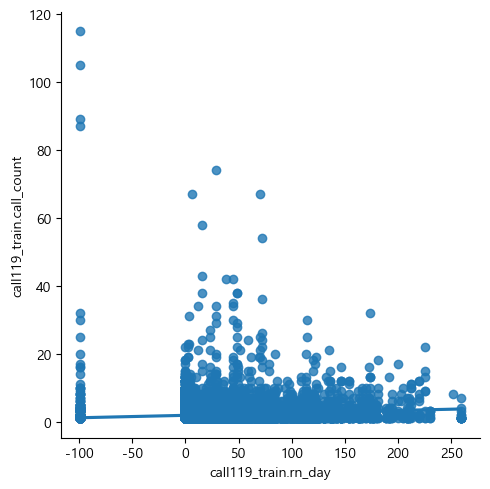

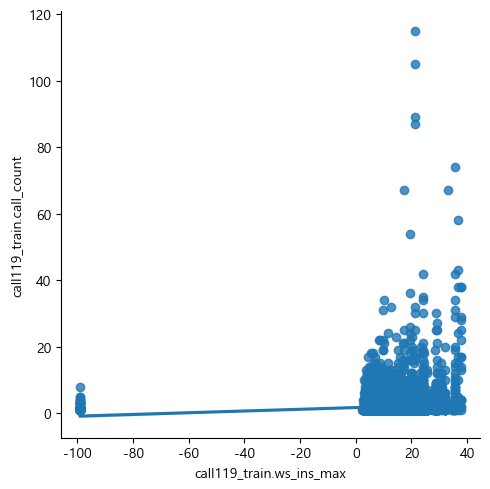

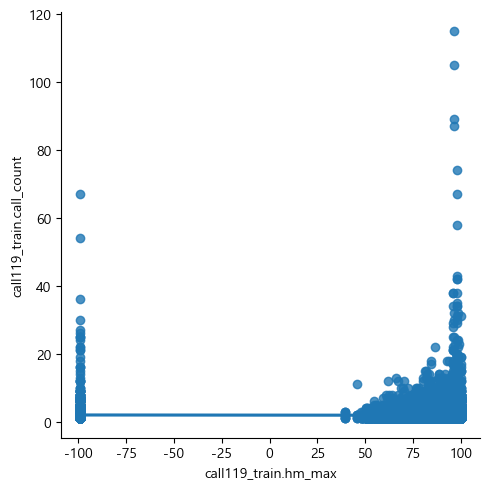

In [62]:
# 기온/강수/풍속/습도와 call_count의 관계
sns.lmplot(x='call119_train.ta_max', y='call119_train.call_count', data=df)  # 최고 기온
sns.lmplot(x='call119_train.rn_day', y='call119_train.call_count', data=df)  # 일 강수량
sns.lmplot(x='call119_train.ws_ins_max', y='call119_train.call_count', data=df)  # 최대 순간 풍속
sns.lmplot(x='call119_train.hm_max', y='call119_train.call_count', data=df)  # 최대 상대 습도

<Axes: xlabel='is_heatwave'>

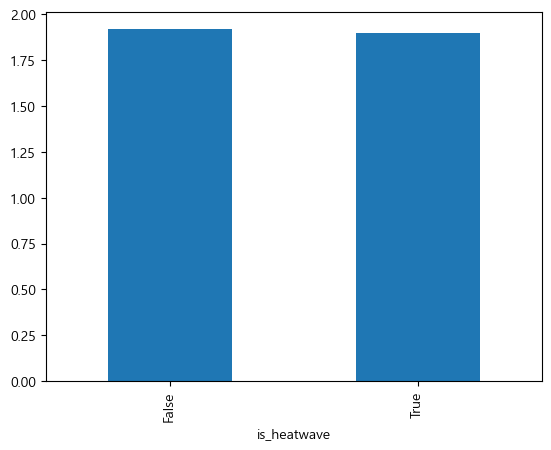

In [63]:
# 이상 기온일/폭우일에 따른 신고량 차이 분석
df['is_heatwave'] = df['call119_train.ta_max'] >= 33
df['is_rainy'] = df['call119_train.rn_day'] >= 50

df.groupby('is_heatwave')['call119_train.call_count'].mean().plot(kind='bar')

<Axes: xlabel='is_rainy'>

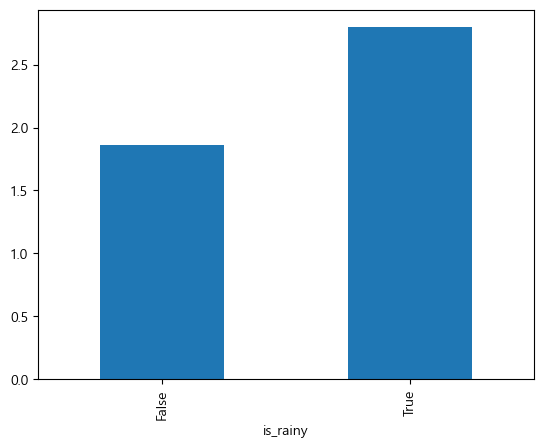

In [64]:
df.groupby('is_rainy')['call119_train.call_count'].mean().plot(kind='bar')

<Axes: xlabel='weekday'>

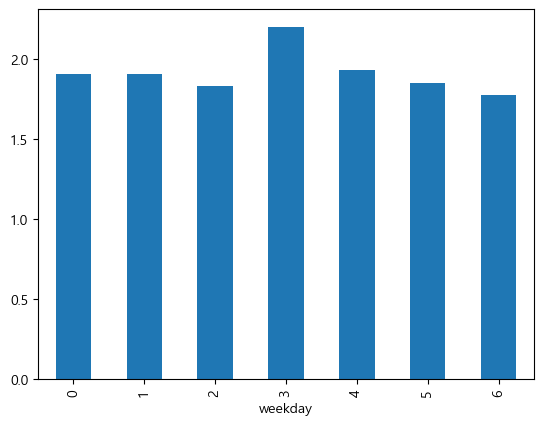

In [65]:
# 요일별 패턴
# 주말 음주사고의 가능성
df['weekday'] = df['call119_train.tm'].dt.dayofweek  # 월:0 ~ 일:6
df.groupby('weekday')['call119_train.call_count'].mean().plot(kind='bar')

In [66]:
# 데이터 병합 
# 열 이름 정리
df_cat = df_cat.rename(columns={
    'cat119_train.tm': 'tm',
    'cat119_train.address_gu': 'address_gu',
    'cat119_train.stn': 'stn',
    'cat119_train.sub_cat': 'sub_cat',
    'cat119_train.call_count': 'call_count'
})

df = df.rename(columns={
    'call119_train.tm': 'tm',
    'call119_train.address_gu': 'address_gu',
    'call119_train.stn': 'stn'
})

# 병합
merged = pd.merge(df_cat, df, on=['tm', 'address_gu', 'stn'], suffixes=('_cat', '_weather'))
merged.head()

,tm,cat119_train.address_city,address_gu,cat119_train.sub_address,cat119_train.cat,sub_cat,stn,call_count,year_cat,month_cat,...,call119_train.ws_max,call119_train.ws_ins_max,call119_train.rn_day,call119_train.call_count,year_weather,month_weather,day_weather,is_heatwave,is_rainy,weekday
0,2020-05-01,부산광역시,강서구,대저2동,구급,교통사고,904,1,2020,5,...,5.8,10.6,0.0,1,2020,5,1,False,False,4
1,2020-05-01,부산광역시,강서구,천성동,구조,교통사고,921,1,2020,5,...,4.8,8.6,0.0,1,2020,5,1,False,False,4
2,2020-05-01,부산광역시,금정구,금사동,구급,부상,940,1,2020,5,...,4.8,8.3,0.0,1,2020,5,1,False,False,4
3,2020-05-01,부산광역시,금정구,금사동,구급,부상,940,1,2020,5,...,4.8,8.3,0.0,1,2020,5,1,False,False,4
4,2020-05-01,부산광역시,금정구,금사동,구급,부상,940,1,2020,5,...,4.8,8.3,0.0,1,2020,5,1,False,False,4


In [67]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216509 entries, 0 to 216508
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   tm                          216509 non-null  datetime64[ns]
 1   cat119_train.address_city   216509 non-null  object        
 2   address_gu                  216509 non-null  object        
 3   cat119_train.sub_address    216509 non-null  object        
 4   cat119_train.cat            216509 non-null  object        
 5   sub_cat                     216509 non-null  object        
 6   stn                         216509 non-null  int64         
 7   call_count                  216509 non-null  int64         
 8   year_cat                    216509 non-null  int32         
 9   month_cat                   216509 non-null  int32         
 10  day_cat                     216509 non-null  int32         
 11  call119_train.address_city  216509 non-